In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   244 non-null    int64  
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5   RH           244 non-null    int64  
 6   Ws           244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    float64
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    float64
 14  Classes      244 non-null    object 
 15  Region       244 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.6+ KB


In [4]:
df.drop(["Unnamed: 0", "day", "month", "year"], axis=1, inplace=True)

In [5]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [6]:
df["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

In [7]:
encoder = LabelEncoder()

In [8]:
df["Classes"] = encoder.fit_transform(df["Classes"])

In [9]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [10]:
df.Classes.value_counts()

0    138
1    106
Name: Classes, dtype: int64

In [11]:
X = df.drop("FWI", axis=1)
y = df["FWI"]

In [12]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Selection on the basis of Correlation

In [13]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374689,0.609525,0.458575,-0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215094,-0.694976,-0.344365,0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073933,0.015384,0.022529,0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296119,-0.353219,-0.301347,0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508360,0.744270,0.592841,-0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877050,0.652894,0.981876,-0.580530,0.197489
DC,0.374689,-0.215094,0.073933,-0.296119,0.508360,0.877050,1.000000,0.496586,0.941251,-0.501292,-0.079207
ISI,0.609525,-0.694976,0.015384,-0.353219,0.744270,0.652894,0.496586,1.000000,0.624038,-0.744568,0.267027
BUI,0.458575,-0.344365,0.022529,-0.301347,0.592841,0.981876,0.941251,0.624038,1.000000,-0.583094,0.092548
Classes,-0.512818,0.429397,0.078171,0.394262,-0.774398,-0.580530,-0.501292,-0.744568,-0.583094,1.000000,-0.158763


<AxesSubplot:>

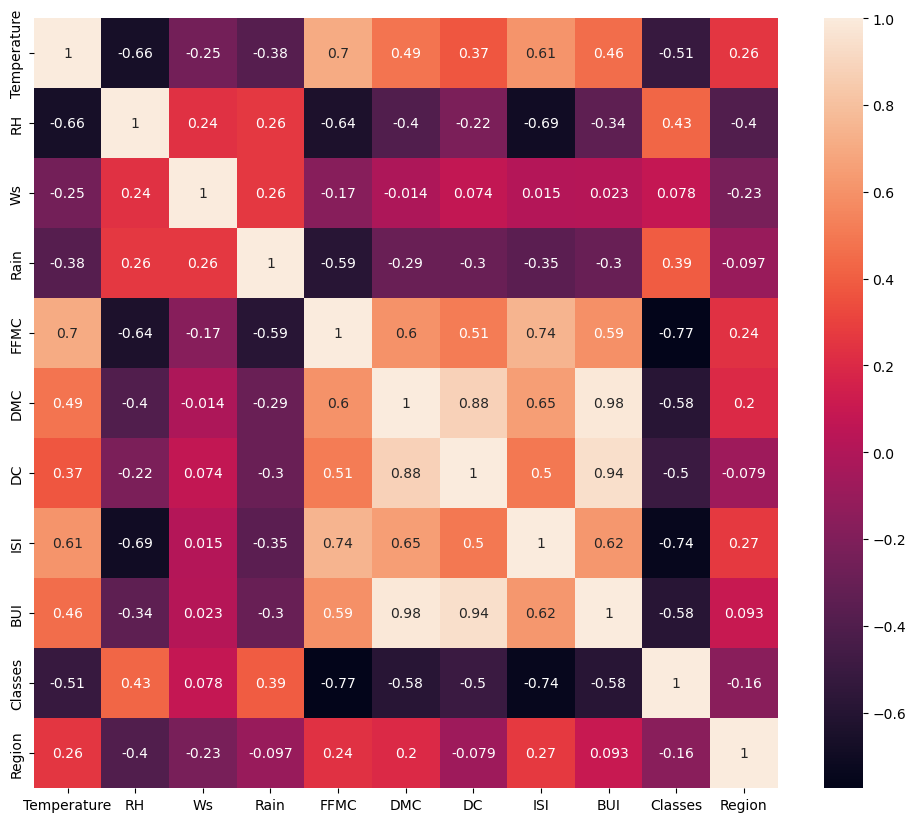

In [14]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [15]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features = correlation(X_train, 0.85)

In [17]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

# Standardization

In [18]:
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

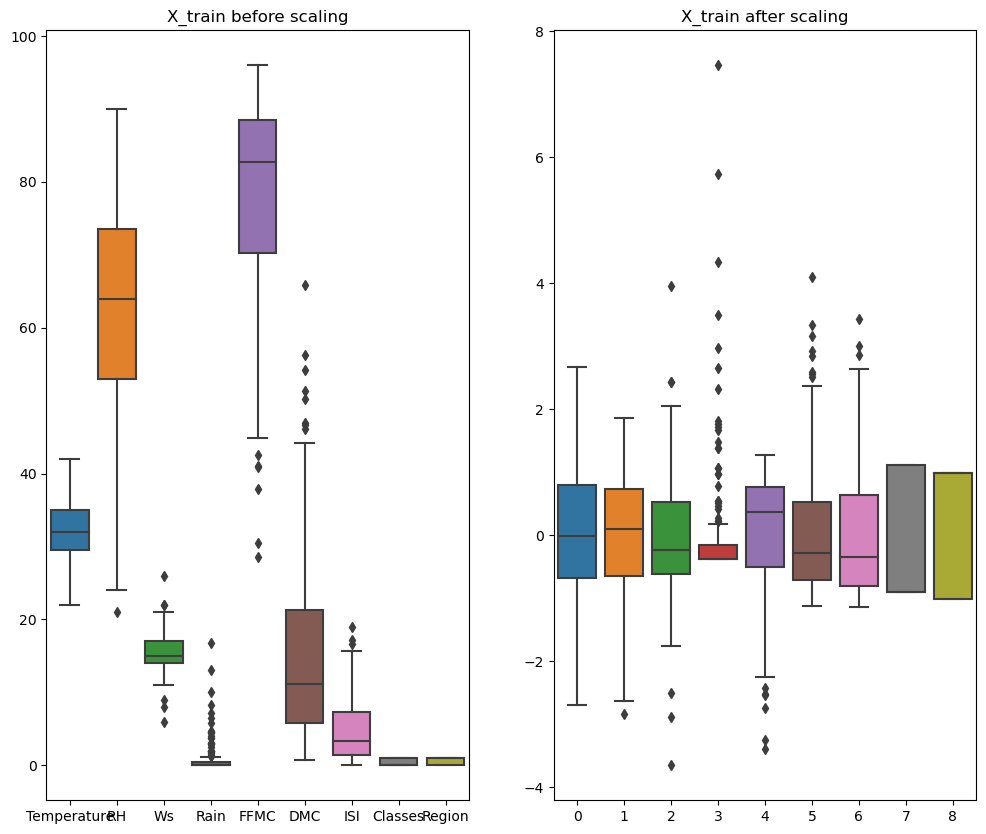

In [20]:
plt.subplots(figsize=(12, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after scaling")

In [21]:
lin_reg = LinearRegression()

In [22]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

MAE:  0.595728124544957
MSE:  0.6264148259125234
R2 Score:  0.9891859227576614


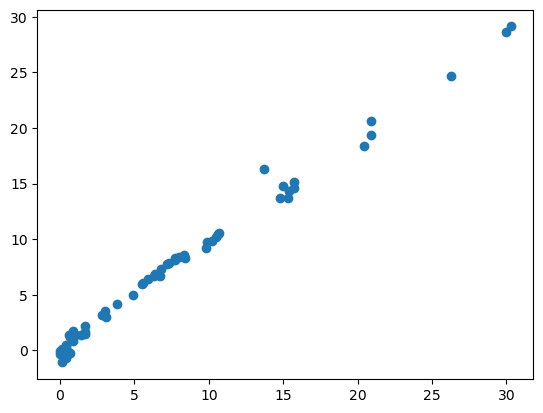

In [23]:
y_pred = lin_reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2 Score: ", r2)

plt.scatter(y_test, y_pred)
plt.show()

# Lasso Regression

In [24]:
lasso = Lasso()

In [25]:
lasso.fit(X_train_scaled, y_train)

Lasso()

MAE:  1.2150397532664745
MSE:  2.8685444941399574
R2 Score:  0.9504790428810086


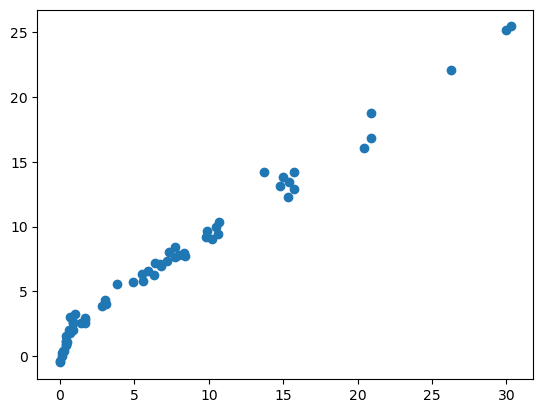

In [26]:
y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2 Score: ", r2)

plt.scatter(y_test, y_pred)
plt.show()

# Ridge Regression

In [27]:
ridge = Ridge()

In [28]:
ridge.fit(X_train_scaled, y_train)

Ridge()

MAE:  0.6192285343850402
MSE:  0.6665304817056233
R2 Score:  0.9884933883819916


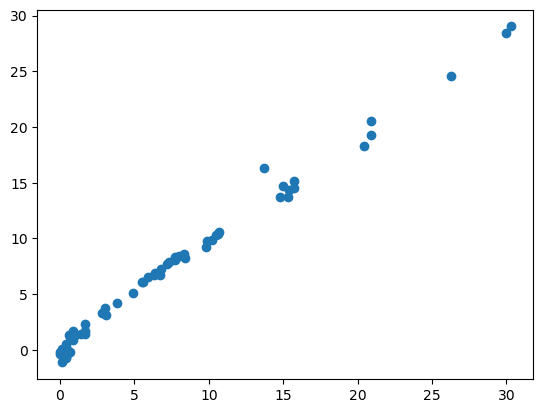

In [29]:
y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2 Score: ", r2)

plt.scatter(y_test, y_pred)
plt.show()

# ElasticNet Regression

In [30]:
elastic = ElasticNet()

In [31]:
elastic.fit(X_train_scaled, y_train)

ElasticNet()

MAE:  1.9193322703595714
MSE:  7.2182186311949215
R2 Score:  0.8753886871752778


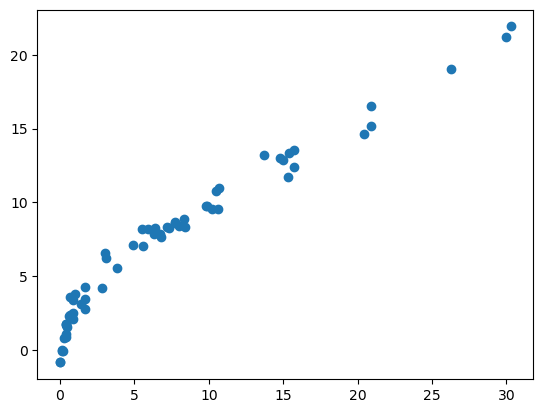

In [32]:
y_pred = elastic.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2 Score: ", r2)

plt.scatter(y_test, y_pred)
plt.show()

# Hyperparameter Tuning

# Cross Validation Lasso

In [33]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [34]:
lassocv.alpha_

0.02505852668995447

MAE:  0.6322629023032291
MSE:  0.6749543060353957
R2 Score:  0.9883479641627526


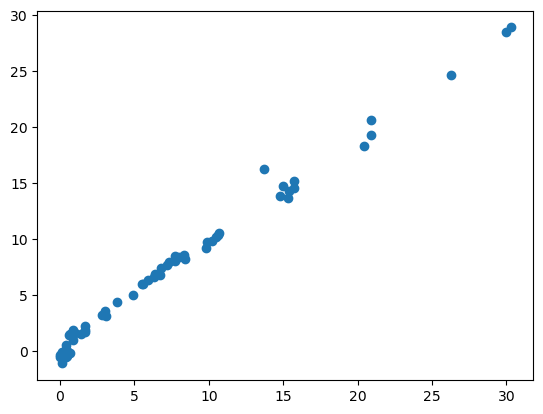

In [35]:
y_pred = lassocv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2 Score: ", r2)

plt.scatter(y_test, y_pred)
plt.show()

# Cross Validation Ridge

In [36]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [37]:
ridgecv.alpha_

1.0

MAE:  0.6192285343850402
MSE:  0.6665304817056233
R2 Score:  0.9884933883819916


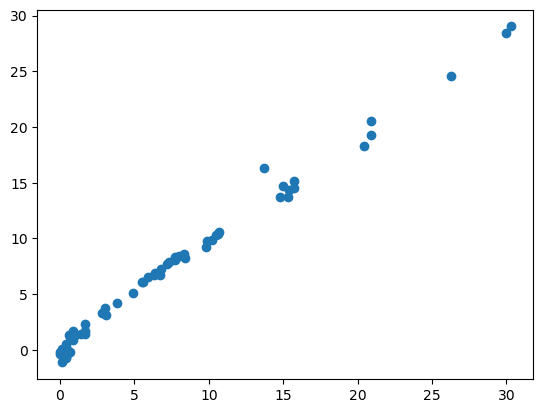

In [38]:
y_pred = ridgecv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2 Score: ", r2)

plt.scatter(y_test, y_pred)
plt.show()

# Cross Validation ElasticNet

In [39]:
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5)

In [40]:
elasticnetcv.alpha_

0.016411075519107917

MAE:  0.6461629206484155
MSE:  0.7041924892251354
R2 Score:  0.9878432124257884


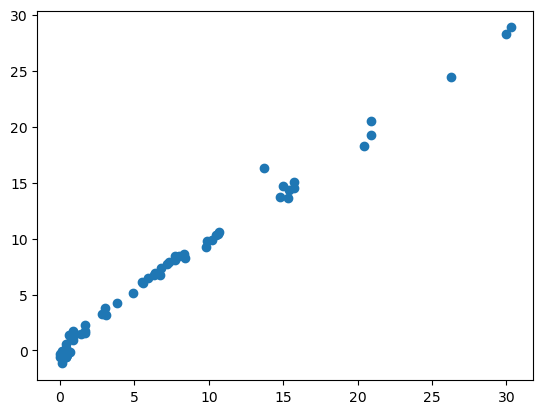

In [41]:
y_pred = elasticnetcv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2 Score: ", r2)

plt.scatter(y_test, y_pred)
plt.show()

In [43]:
lin_reg

LinearRegression()

In [44]:
scaler

StandardScaler()

In [46]:
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(lin_reg, open("lin_reg.pkl", "wb"))